In [183]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

In [184]:
#list_of_tickers = ["MJ", 'SPY']
#end_date= datetime.now()
#start_date= end_date + timedelta(-365)
#tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", columns='close')
#tickers_df.head()

In [185]:
#read aggregate data csv
aggregate_df= pd.read_csv("aggregate_data.csv")
aggregate_df.set_index(pd.to_datetime(aggregate_df['date'], infer_datetime_format=True), inplace=True)
aggregate_df.drop(columns=['date'], inplace=True)
agg_df_asc= aggregate_df.sort_index(ascending= True)
agg_df_asc.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2016-09-19,98.87,83.69,29.457,65.89,46.00,213.41
2016-09-20,99.61,84.02,29.457,67.51,46.12,213.42
2016-09-21,101.36,85.08,29.457,68.28,46.27,215.82
2016-09-22,102.83,85.97,30.460,68.83,46.56,217.18
2016-09-23,102.85,85.75,30.170,68.14,46.91,215.99


In [186]:
#tickers_df.to_csv("MJ_index_data")

In [187]:
#tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
#tickers_df.head()

In [188]:
#calculate 2 year returns for indexes and drop nulls
df_daily_returns = agg_df_asc.pct_change().dropna()
df_daily_returns.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2016-09-20,0.007485,0.003943,0.000000,0.024586,0.002609,0.000047
2016-09-21,0.017569,0.012616,0.000000,0.011406,0.003252,0.011245
2016-09-22,0.014503,0.010461,0.034050,0.008055,0.006268,0.006302
2016-09-23,0.000194,-0.002559,-0.009521,-0.010025,0.007517,-0.005479
2016-09-26,0.000194,-0.020292,0.000000,-0.005430,-0.026220,-0.008102


In [189]:
# Calculate Sharpe Ratio
sharpe_ratios = (df_daily_returns.mean() * 756) / (df_daily_returns.std() * np.sqrt(756))
sharpe_ratios

BOOZ    0.268030
SMOK   -0.768188
MJ      0.004573
XBI     0.711276
XPH    -0.416935
SPY     1.647644
dtype: float64

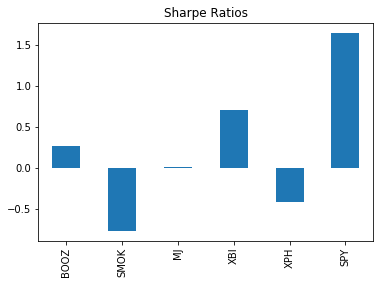

In [190]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

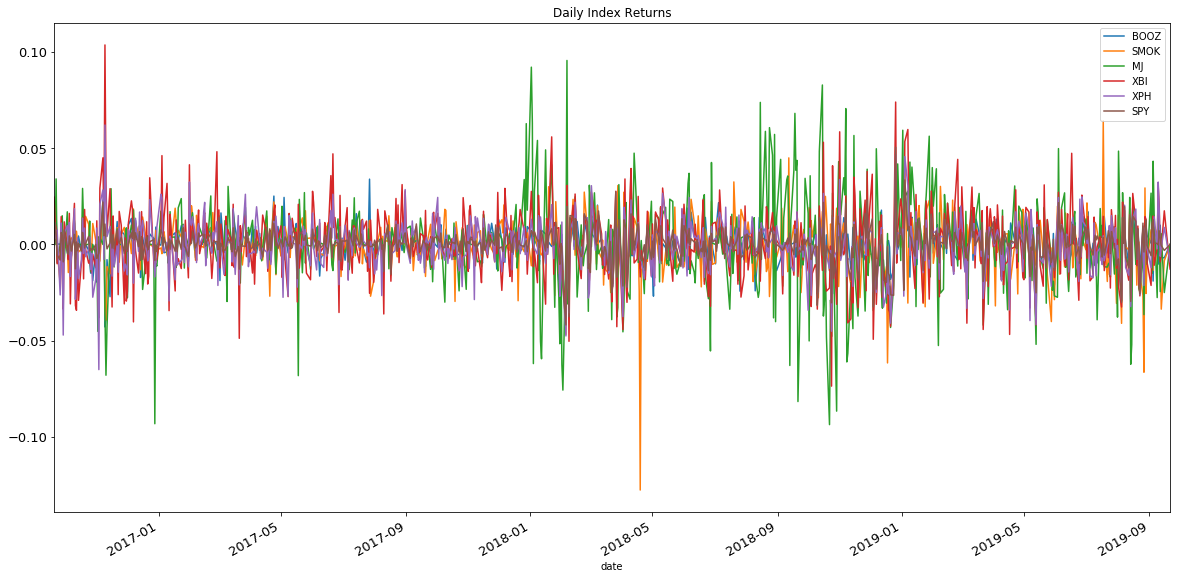

In [191]:
# Plot daily retuns for indexes
df_daily_returns.plot(figsize=(20,10), title= "Daily Index Returns", fontsize=13);

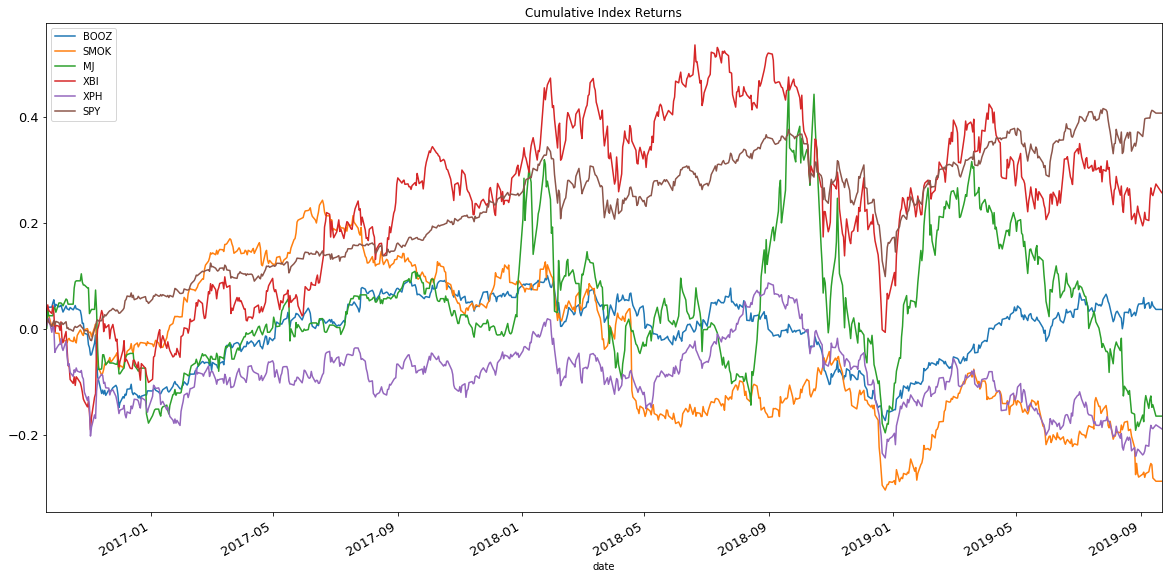

In [192]:
# Plot cumulative returns for the indexes
cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
cumulative_returns_indexes.plot(figsize=(20,10), title= "Cumulative Index Returns", fontsize=13);


In [193]:
#HV plot of cumulative returns
cumulative_returns_indexes.hvplot.line(ylabel= "cumulative returns", xlabel= "date")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

# 20, 50, 100 day moving averages of MJ

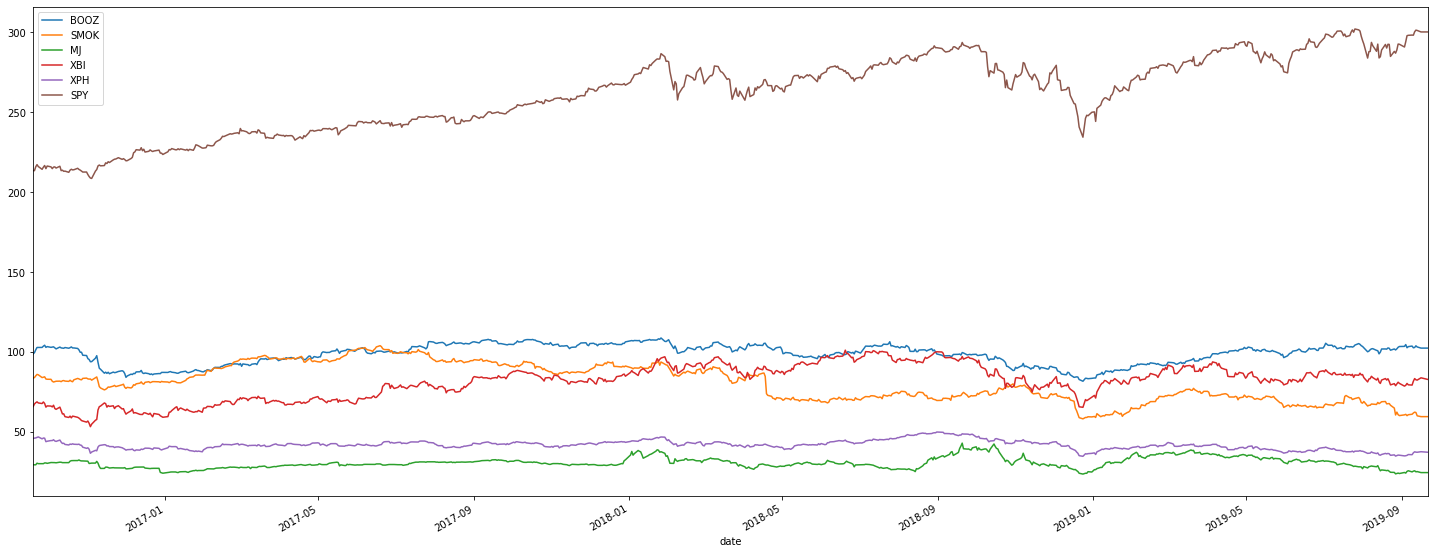

In [194]:
#20, 50,100 day SMA of MJ
mj_sma_20 = agg_df_asc["MJ"].rolling(window=20).mean()
mj_sma_50 = agg_df_asc["MJ"].rolling(window=50).mean()
mj_sma_100 = agg_df_asc["MJ"].rolling(window=100).mean()
axes = agg_df_asc.plot(figsize=(25,10))

In [195]:
# Daily Standard Deviations if indexes
# Calculate the standard deviation for each portfolio. 
indexes_daily_std= cumulative_returns_indexes.std()
indexes_daily_std.sort_values(ascending=False)

XBI     0.163155
SMOK    0.137695
MJ      0.117036
SPY     0.111516
BOOZ    0.063705
XPH     0.062148
dtype: float64

In [196]:
annualized_std_indexes = indexes_daily_std * np.sqrt(252)
annualized_std_indexes

BOOZ    1.011293
SMOK    2.185848
MJ      1.857890
XBI     2.590008
XPH     0.986565
SPY     1.770265
dtype: float64

In [197]:
correlation= agg_df_asc.corr()
correlation

,BOOZ,SMOK,MJ,XBI,XPH,SPY
BOOZ,1.000000,0.305083,0.218449,0.453539,0.275505,0.318264
SMOK,0.305083,1.000000,-0.041690,-0.334894,0.279037,-0.562516
MJ,0.218449,-0.041690,1.000000,0.451009,0.414439,0.393592
XBI,0.453539,-0.334894,0.451009,1.000000,0.423882,0.831621
XPH,0.275505,0.279037,0.414439,0.423882,1.000000,0.073947
SPY,0.318264,-0.562516,0.393592,0.831621,0.073947,1.000000


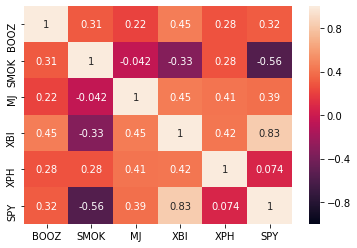

In [198]:
#Correlation heat map
import seaborn as sns
corr_all = agg_df_asc.corr()
sns.heatmap(corr_all, xticklabels=corr_all.columns.values, vmin=-1, vmax=1,
            yticklabels=corr_all.columns.values, annot= True)

In [199]:
#daily returns pct change
df_daily_returns.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2016-09-20,0.007485,0.003943,0.000000,0.024586,0.002609,0.000047
2016-09-21,0.017569,0.012616,0.000000,0.011406,0.003252,0.011245
2016-09-22,0.014503,0.010461,0.034050,0.008055,0.006268,0.006302
2016-09-23,0.000194,-0.002559,-0.009521,-0.010025,0.007517,-0.005479
2016-09-26,0.000194,-0.020292,0.000000,-0.005430,-0.026220,-0.008102


# Calculate Volatility

In [200]:
#annualized volatility
volatility = df_daily_returns.std() * np.sqrt(252)
volatility

BOOZ    0.141347
SMOK    0.207236
MJ      0.350061
XBI     0.283631
XPH     0.204419
SPY     0.128754
dtype: float64

In [201]:
#calculate average daily returns of each index
avg_daily_return_booz = df_daily_returns.mean()['BOOZ']
avg_daily_return_smok = df_daily_returns.mean()['SMOK']
avg_daily_return_mj = df_daily_returns.mean()['MJ']
avg_daily_return_xbi = df_daily_returns.mean()['XBI']
avg_daily_return_xph = df_daily_returns.mean()['XPH']
avg_daily_return_spy = df_daily_returns.mean()['SPY']
print("BOOZ average daily return is", avg_daily_return_booz)
print("SMOK average daily return is", avg_daily_return_smok)
print("MJ average daily return is", avg_daily_return_mj)
print("XBI average daily return is", avg_daily_return_xbi)
print("XPI average daily return is", avg_daily_return_xph)
print("SPY average daily return is", avg_daily_return_spy)

BOOZ average daily return is 8.679804971413078e-05
SMOK average daily return is -0.0003647300203599301
MJ average daily return is 3.66795916561003e-06
XBI average daily return is 0.0004622016905746064
XPI average daily return is -0.00019526748493822746
SPY average daily return is 0.00048603052609922916


In [202]:
#calculate daily std dev of indexes
std_dev_daily_return_booz = df_daily_returns.std()['BOOZ']
std_dev_daily_return_smok = df_daily_returns.std()['SMOK']
std_dev_daily_return_mj = df_daily_returns.std()['MJ']
std_dev_daily_return_xbi = df_daily_returns.std()['XBI']
std_dev_daily_return_xph = df_daily_returns.std()['XPH']
std_dev_daily_return_spy = df_daily_returns.std()['SPY']
print("BOOZ volatility is", std_dev_daily_return_booz)
print("SMOK volatility is", std_dev_daily_return_smok)
print("MJ volatility is", std_dev_daily_return_mj)
print("XBI volatility is", std_dev_daily_return_xbi)
print("XPH volatility is", std_dev_daily_return_xph)
print("SPY volatility is", std_dev_daily_return_spy)


BOOZ volatility is 0.008904031055788826
SMOK volatility is 0.013054637625755917
MJ volatility is 0.022051761164075038
XBI volatility is 0.017867101297148497
XPH volatility is 0.012877218060406787
SPY volatility is 0.008110748686137108


In [203]:
#show the final closigprices
booz_last_price = aggregate_df['BOOZ'][0]
smok_last_price = aggregate_df['SMOK'][0]
mj_last_price = aggregate_df['MJ'][0]
xbi_last_price = aggregate_df['XBI'][0]
xph_last_price = aggregate_df['XPH'][0]
spy_last_price = aggregate_df['SPY'][0]
print(booz_last_price)
print(smok_last_price)
print(mj_last_price)
print(xbi_last_price)
print(xph_last_price)
print(spy_last_price)

102.44
59.58
24.59
82.79
37.3
300.16


In [204]:
# Setup the Monte Carlo Parameters 500msimulations over 2 years
number_simulations = 500
number_records = 252 * 2
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [205]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices = [mj_last_price]
    simulated_booz_prices = [booz_last_price]
    #simulated_smok_prices = [smok_last_price]
    
    # Simulate the returns
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_mj_price = simulated_mj_prices[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        simulated_booz_price = simulated_booz_prices[-1] * (1 + np.random.normal(avg_daily_return_booz, std_dev_daily_return_booz))
        #simulated_smok_price = simulated_smok_prices[-1] * (1 + np.random.normal(avg_daily_return_smok, std_dev_daily_return_smok))
       
        # Append the simulated price to the list
        simulated_mj_prices.append(simulated_mj_price)
        simulated_booz_prices.append(simulated_booz_price)
        #simulated_smok_prices.append(simulated_smok_price)
    
        
    monte_carlo["MJ prices"] = pd.Series(simulated_mj_prices)
    monte_carlo["BOOZ prices"] = pd.Series(simulated_booz_prices)
    #monte_carlo["SMOK prices"] = pd.Series(simulated_smok_prices)
    #print(monte_carlo)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
   
    # Set the portfolio weights50/50
    weight = [.5, .5]
    portfolio_daily_return= simulated_daily_returns.dot(weight)
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_return.fillna(0)).cumprod()
portfolio_cumulative_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
500,0.935328,1.194463,1.195587,1.123451,1.028132,1.776228,0.939293,1.380065,1.196768,2.162694,...,0.836394,0.950912,0.868503,0.795533,1.268805,0.718896,1.022899,0.826955,1.652637,0.918534
501,0.944113,1.195624,1.206242,1.138844,1.023755,1.763099,0.940359,1.369493,1.194792,2.173064,...,0.832663,0.954157,0.858903,0.808727,1.254991,0.726286,1.035293,0.827871,1.649566,0.922043
502,0.939562,1.199629,1.206422,1.136164,1.033193,1.783976,0.920104,1.374113,1.188797,2.169367,...,0.810563,0.957881,0.859793,0.811745,1.249842,0.725136,1.036857,0.835145,1.701861,0.932624
503,0.954768,1.203056,1.214454,1.150982,1.019047,1.758597,0.916675,1.364373,1.160490,2.172309,...,0.825525,0.962363,0.838651,0.805136,1.263472,0.711203,1.033765,0.827215,1.681642,0.928020
504,0.951198,1.208841,1.214954,1.163838,1.013108,1.748917,0.910655,1.377795,1.165827,2.177330,...,0.841991,0.949532,0.835728,0.797547,1.251161,0.712473,1.032471,0.835222,1.679052,0.909321


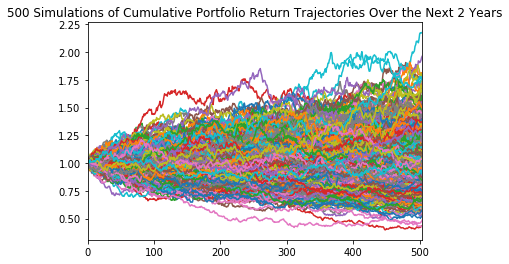

In [206]:
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 2 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [ ]:
# Select the end of year for MJ simulation
simulated_end_yr1 = simulated_price_df.iloc[-1, :]
simulated_ending_prices.head()

### MJ INDEX Monte Carlo simulation

In [207]:
# Monte carlo for MJ index 500 simulations in 2 years

mj_sim_df= pd.DataFrame()

for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices_index = [mj_last_price]

    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        mj_sim_price = simulated_mj_prices_index[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        # Append the simulated price to the list
        simulated_mj_prices_index.append(mj_sim_price)
    
    # Create a DataFrame of the simulated prices
    #simulated_price_df = pd.DataFrame({
        #"Simulated MJ Prices": simulated_mj_prices
        #})

    # Print head of DataFrame
    mj_sim_df[f"Simulation {n+1}"]= pd.Series(simulated_mj_prices_index)
mj_sim_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,...,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000
1,23.771600,23.761614,24.260688,24.664243,24.690405,24.135583,25.088421,25.370429,24.272359,25.621194,...,25.620202,24.255664,24.006427,25.539700,25.633203,24.837589,24.850148,24.898449,24.870225,24.399684
2,23.900062,23.664488,25.649991,23.124558,24.952424,25.011481,23.672127,25.704231,24.759824,25.732973,...,26.167486,24.612481,23.711630,26.273215,26.037278,24.680820,23.973756,24.658616,25.737708,23.676009
3,23.971797,23.160947,26.081729,22.374416,24.694898,25.496129,23.202825,26.460757,24.885995,25.915973,...,26.388048,24.978218,23.283565,25.620588,25.045037,24.648758,23.353299,24.709626,25.358025,22.756851
4,23.370028,23.784141,25.313449,22.318623,25.796237,25.922839,23.727897,26.085007,25.181800,25.556717,...,25.535471,24.999894,24.389060,26.035791,24.534773,25.238550,22.381422,24.003455,26.098729,22.298574


In [208]:
print(std_dev_daily_return_mj)

0.022051761164075038


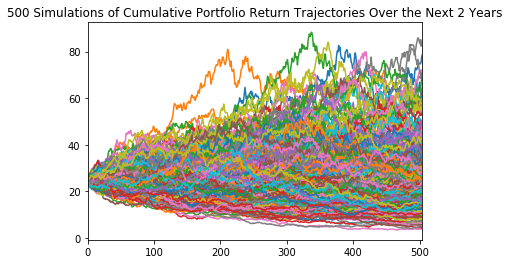

In [209]:
#Simulated stock price trajectory for MJ
plot_title_mj = f"{n+1} Simulations of MJ Cumulative Portfolio Return Trajectories Over the Next 2 Years"
mj_sim_df.plot(legend=None, title=plot_title)

In [226]:
# Select the end of year for MJ simulation
simulated_end_yr1 = mj_sim_df.iloc[252, :]
simulated_end_yr1.head()

Simulation 1    25.759431
Simulation 2    45.664180
Simulation 3    37.367492
Simulation 4    18.533455
Simulation 5    19.123235
Name: 252, dtype: float64

In [230]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval_yr1 = simulated_end_yr1.quantile(q=[0.025, 0.975])
confidence_interval_yr1

0.025    10.726397
0.975    47.023681
Name: 252, dtype: float64

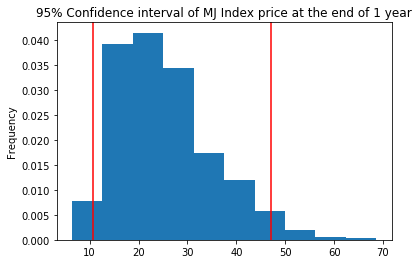

In [234]:
#Simulated returns at 1 year with 95% confidence interval
simulated_end_yr1.plot(kind='hist', title= "95% Confidence interval of MJ Index price at the end of 1 year", density=True, bins=10)
plt.axvline(confidence_interval_yr1.iloc[0], color='r')
plt.axvline(confidence_interval_yr1.iloc[1], color='r')

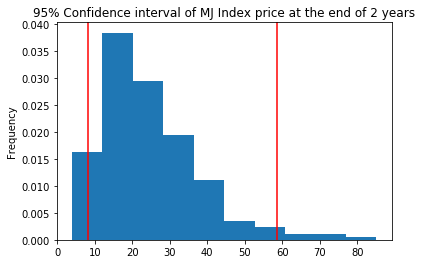

In [235]:
# Select the end of year 2 for MJ simulation and confidence interval
simulated_end_yr2 = mj_sim_df.iloc[-1, :]
confidence_interval_yr2 = simulated_end_yr2.quantile(q=[0.025, 0.975])
simulated_end_yr2.plot(kind='hist', title= "95% Confidence interval of MJ Index price at the end of 2 years", density=True, bins=10)
plt.axvline(confidence_interval_yr2.iloc[0], color='r')
plt.axvline(confidence_interval_yr2.iloc[1], color='r')
#simulated_end_yr2.head()

In [221]:
#Daily returs of simulated stock price
#simulated_mj_daily_returns = mj_sim_df.pct_change()
#simulated_mj_daily_returns.head()

In [222]:
#cumulative returns of simulated MJ stock prices
#simulated_mj_cumulative_returns = (1 + mj_sim_df).cumprod()
#simulated_mj_cumulative_returns.head()


### Calculate the Cumulative Profits/Losses of Simulated Stock Prices for MJ Index

In [223]:
# Multiply an initial investment of 10,000 by the cumulative returns of simulative stock prices to
# return the progression of cumulative returns in terms of money
#initial_investment = 10000
#cumulative_pnl = initial_investment * mj_sim_df
#cumulative_pnl.head()

In [213]:
#cumulative_pnl.plot(figsize= (15,8), title= "Cumulative P&L of $10,000 invested in 10 years")

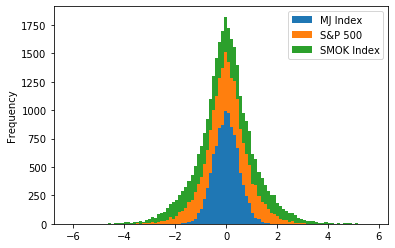

In [214]:
std_dev_daily_return_mj = np.random.normal(scale=0.5, size=10000)
std_dev_daily_return_spy = np.random.normal(scale=1.0, size=10000)
std_dev_daily_return_smok = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "MJ Index": std_dev_daily_return_mj,
    "S&P 500": std_dev_daily_return_spy,
    "SMOK Index": std_dev_daily_return_smok
})

portfolio_std.plot.hist(stacked=True, bins=100)